In [1]:
# ! pip install contractions
# ! pip install nltk

In [2]:
import nltk
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('punt_tab')

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
from pathlib import Path
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import contractions
from nltk import pos_tag

In [4]:
from nltk.corpus import stopwords
from nltk import pos_tag
# nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [5]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
# Initialize stemmer/lemmatizer (run once)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [6]:
base_path = Path(r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project\TXT")

# 1. Prepare data

## Step 1: Run only once and make sure you have previously changed the files name of the first 9 files by taking the 0 out of it (out of the name).

In [7]:
sessions = np.arange(1, 10)

path = os.path.realpath(base_path)
path = os.startfile(path)

for session in sessions:
    year = session + 1945
    session_folder = base_path / f"Session {int(session):02d} - {year}"

    for file in session_folder.iterdir():
        new_name = file.stem.replace("0", "") + file.suffix
        new_path = file.with_name(new_name)
        file.rename(new_path)
        print(f"Renamed: {file.name} → {new_path.name}")
    


Renamed: ARG_1_1946.txt → ARG_1_1946.txt
Renamed: AUS_1_1946.txt → AUS_1_1946.txt
Renamed: BEL_1_1946.txt → BEL_1_1946.txt
Renamed: BLR_1_1946.txt → BLR_1_1946.txt
Renamed: BOL_1_1946.txt → BOL_1_1946.txt
Renamed: BRA_1_1946.txt → BRA_1_1946.txt
Renamed: CAN_1_1946.txt → CAN_1_1946.txt
Renamed: CHL_1_1946.txt → CHL_1_1946.txt
Renamed: CHN_1_1946.txt → CHN_1_1946.txt
Renamed: COL_1_1946.txt → COL_1_1946.txt
Renamed: CSK_1_1946.txt → CSK_1_1946.txt
Renamed: CUB_1_1946.txt → CUB_1_1946.txt
Renamed: ECU_1_1946.txt → ECU_1_1946.txt
Renamed: EGY_1_1946.txt → EGY_1_1946.txt
Renamed: FRA_1_1946.txt → FRA_1_1946.txt
Renamed: GBR_1_1946.txt → GBR_1_1946.txt
Renamed: GRC_1_1946.txt → GRC_1_1946.txt
Renamed: HTI_1_1946.txt → HTI_1_1946.txt
Renamed: IND_1_1946.txt → IND_1_1946.txt
Renamed: IRN_1_1946.txt → IRN_1_1946.txt
Renamed: LBN_1_1946.txt → LBN_1_1946.txt
Renamed: LBR_1_1946.txt → LBR_1_1946.txt
Renamed: LUX_1_1946.txt → LUX_1_1946.txt
Renamed: MEX_1_1946.txt → MEX_1_1946.txt
Renamed: NLD_1_1

## Step 2: Functions to count the number of tokens and sentences

In [8]:
def count_number_of_sentences_and_tokens(text):
    """Count the number of sentences and tokens in a text file."""
    number_sentences = len(sent_tokenize(text))
    number_tokens = len(word_tokenize(text))
    return number_sentences, number_tokens

## Step 3: Create DFs

In [9]:
base_path = r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project\TXT"

### Check if thall the files are there

In [10]:
# Raw string path (exactly as shown in your File Explorer)
sessions = range(1, 80)
data = []

for session in tqdm(sessions):
    # Construct path using os.path.join() for reliability
    folder_name = f"Session {session:02d} - {1945 + session}"
    full_path = os.path.join(base_path, folder_name)
    
    # Check if path exists before using it
    if os.path.exists(full_path):
        data.append(full_path)
    else:
        print(f"Warning: Folder not found - {full_path}")

print(f"Found {len(data)} valid session folders")

100%|██████████| 79/79 [00:00<00:00, 3836.14it/s]

Found 79 valid session folders


In [11]:
def load(url):
    with open(url, 'r', encoding='utf-8') as f:
        text = f.read()
    
    return text

## Step 4: DF raw Run Once

In [12]:
sessions = np.arange(1, 80)
data=[]

for session in tqdm(sessions):
    # directory = base_path + "\\Session "+str(0 + session)+" - "+str(1945+session)
    directory = f"{base_path}\\Session {session:02d} - {1945 + session}"
    for filename in os.listdir(directory):
        if filename[0] == ".":  # Skip hidden files
            continue
        filepath = os.path.join(directory, filename)
        splt = filename.split('_')
        txt = load(f'{filepath}')
        number_sentences, number_tokens = count_number_of_sentences_and_tokens(txt)
        data.append([session, 1945+session, splt[0], txt, number_sentences, number_tokens])
        
df_raw = pd.DataFrame(data, columns=['Session','Year','ISO-Code','Speech', "number_sentences", "number_tokens"])
df_raw.to_csv(r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project" + "\\UN_Speeches_raw.csv", index=False, encoding='utf-8')
df_raw

100%|██████████| 79/79 [03:03<00:00,  2.33s/it]


,Session,Year,ISO-Code,Speech,number_sentences,number_tokens
0,1,1946,ARG,At the resumption of the first session of the ...,126,3739
1,1,1946,AUS,The General Assembly of the United Nations is ...,124,4897
2,1,1946,BEL,The\tprincipal organs of the United Nations ha...,97,2750
3,1,1946,BLR,As more than a year has elapsed since the Unit...,93,3350
4,1,1946,BOL,Coming to this platform where so many distingu...,52,1686
...,...,...,...,...,...,...
10947,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572
10948,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876
10949,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870
10950,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348


# 2. Join with the World bank label data

In [100]:
df_raw = pd.read_csv(r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project\UN_Speeches_raw.csv") 
df_raw_1990 = df_raw[df_raw['Year'] >= 1990]
df_raw_1990

,Session,Year,ISO-Code,Speech,number_sentences,number_tokens
4430,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982
4431,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970
4432,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783
4433,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407
4434,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816
...,...,...,...,...,...,...
10947,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572
10948,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876
10949,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870
10950,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348


In [101]:
label_income_1990 = pd.read_csv(r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project\label_world_bank_1990.csv") 
label_income_1990

,Entity,ISO-Code,Year,Income Level
0,Afghanistan,AFG,1990,1.0
1,Afghanistan,AFG,1991,1.0
2,Afghanistan,AFG,1992,1.0
3,Afghanistan,AFG,1993,1.0
4,Afghanistan,AFG,1994,1.0
...,...,...,...,...
7325,Virgin Islands (U.S.),VIR,2024,4.0
7326,West Bank and Gaza,PSE,2024,2.0
7327,"Yemen, Rep.",YEM,2024,1.0
7328,Zambia,ZMB,2024,2.0


In [102]:
df_speeches_1990_code_list = df_raw_1990['ISO-Code'].unique() 
wb_labels_final_1990_list = label_income_1990['ISO-Code'].unique()

not_in_speeches = [item for item in wb_labels_final_1990_list if item not in df_speeches_1990_code_list]
print("Country codes in WB, but not in UN speeches:", not_in_speeches)

not_in_wb = [item for item in df_speeches_1990_code_list if item not in wb_labels_final_1990_list]
print("Country codes in UN speeches, but not in WB:", not_in_wb)


Country codes in WB, but not in UN speeches: ['ASM', 'ABW', 'BMU', 'VGB', 'CYM', 'CHI', 'CUW', 'FRO', 'PYF', 'GIB', 'GRL', 'GUM', 'HKG', 'IMN', 'XKX', 'MAC', 'NCL', 'MNP', 'PRI', 'MAF', 'SXM', 'TWN', 'TCA', 'VIR']
Country codes in UN speeches, but not in WB: ['CSK', 'DDR', 'VAT', 'EU']


In [103]:
def add_income_level(speeches_df, income_df):
    # merge on ISO-Code and Year
    merged = speeches_df.merge(
        income_df[['ISO-Code', 'Year', 'Income Level']],
        how='left',
        on=['ISO-Code', 'Year']
    )
    
    # fill missing income levels with 0
    merged['Income Level'] = merged['Income Level'].fillna(0).astype(int)
    
    return merged

df_combined = add_income_level(df_raw_1990, label_income_1990)
df_combined

,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2
...,...,...,...,...,...,...,...
6517,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2
6518,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1
6519,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3
6520,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2


In [104]:
list_not_in_WB = df_combined[df_combined['Income Level'] == 0]['ISO-Code'].unique()
list_not_in_WB

array(['BLR', 'CSK', 'DDR', 'LIE', 'RUS', 'UKR', 'YUG', 'MCO', 'SMR',
       'NRU', 'TUV', 'VAT', 'EU', 'VEN'], dtype=object)

**Notes in the results above**

TUV -> Tuvalu 

NRU -> Nauru

SMR -> San Marino

VAT -> Vatican is an observer state 

EU -> Overall represenatative

VEN -> Venezuela Not enough data

# 3. Final DF

In [105]:
final_df = df_combined[df_combined['Income Level'] != 0]
final_df

,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2
...,...,...,...,...,...,...,...
6517,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2
6518,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1
6519,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3
6520,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2


# 4. Clean Without Postagging

In [106]:
def take_out_mentions_to_the_president(text):
    """Remove introductory phrases addressing the president or other dignitaries from text.
    Args:
        text (str): The input text to process    
    Returns:
        str: The text with introductory address phrases removed, or original text if none found
    """
    
    # Split into sentences (simple regex)
    # The regex looks for sentence-ending punctuation followed by whitespace
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    
    # Get first 4 sentences as search area - addresses are typically at the beginning
    search_area = ' '.join(sentences[:2]).lower()
    
    # Phrases to search for (lowercase)
    # We look for various forms of presidential/dignitary addresses
    # Store the index where each phrase is found (-1 if not found)
    possible_starts = [
        search_area.lower().find("mr. president"),  # Formal address with period
        search_area.lower().find("mr president"),   # Formal address without period
        search_area.lower().find("ladies and gentlemen"),  # Common formal address
        search_area.lower().find("your excellency"),  # Covers "your excellence" and "your excellency"
        search_area.lower().find("your excellence"),  # Covers "your excellence" and "your excellency"
        search_area.lower().find("your majesties"),  # 
        search_area.lower().find("your majesties"),  # 
        search_area.lower().find("president of the general assembly"),
        search_area.lower().find("excellencies"),     # Plural form of address
        search_area.lower().find("esteemed president"),  # Honorific address
        search_area.lower().find("distinguished delegates"),  # Assembly address
        search_area.lower().find("allah"),  # Address to members of an assembly
    ]
    
    # Filter out phrases that weren't found (-1) and keep only valid indices
    starts = [start for start in possible_starts if start != -1]
    
    # Get the latest occurrence of any address phrase
    start = max(starts) if len(starts) > 0 else -1
    
    if start == -1:
        # No address phrases found - log this and return full text
        # print(f"Could not find probable start in the text of {url}")
        start = 0
    
    # Return text starting from after the address phrase
    return text[start:]

In [107]:
def simple_clean(text):
    """Cleans text by removing common formatting artifacts from PDF conversions and UN document patterns.
    
    Args:
        text (str): Input text to be cleaned
        
    Returns:
        str: Cleaned text with unwanted patterns removed
    """
    
    # Convert to lowercase for consistent processing
    text = text.lower()
  
    # 1: Remove UN document reference numbers (e.g. "20/26 15-29876")
    text = re.sub(r'\b\d{1,4}\s*/\s*\d{1,4}\s+\d{2,4}-\d{4,8}\b', ' ', text)
    
    # 2: Remove UN meeting record references (e.g. "A/70/PV.24")
    text = re.sub(r'\b[a-z]\s*/\s*\d+\s*/pv\s*\.\s*\d+\b', ' ', text, flags=re.IGNORECASE)
    
    # 3: Remove dates in DD/MM/YYYY format (e.g. "31/12/2023")
    text = re.sub(r'\d{2}\/\d{2}\/\d{4}', '', text) 
  
    # 4: Remove form feed characters (often from PDF conversion)
    text = re.sub(r'\x0c', '', text) 
  
    # 5: Remove parenthetical document references (e.g. "(A/70/123)" or "(A/70/123, annex)")
    text = re.sub(r'\(\s*[a-z]\s*/\s*\d+\s*/\s*\d+\s*(?:,\s*annex)?\s*\)', '', text, flags=re.IGNORECASE)
    
    # 6: Remove standalone line numbers/page numbers (e.g. "42" on its own line)
    text = re.sub(r'^\s*\d+\s*$\n?', '', text, flags=re.MULTILINE)
    
    # 7: Normalize newlines - replace all with single spaces
    text = re.sub(r'\n', ' ', text, flags=re.MULTILINE)

    # 8: Remove numbered list prefixes (e.g. "1.    Some text")
    text = re.sub(r'\d+\.\t', '', text)

    # 9: Remove Unicode BOM (Byte Order Mark) character if present
    text = text.replace('\ufeff', '')
    
    # 10: Normalize whitespace - collapse multiple spaces into one and trim
    text = re.sub(r'\s+', ' ', text).strip()

    # 11. Remove standalone hyphens
    text = re.sub(r'\s*-(?!\w)(?<!\w)-*\s*', ' ', text)

    # 12: Remove punctuations
    text = text.replace('—', '').replace(',', '').replace(':', '').replace('’', '').replace('“', '').replace("”", '').replace(";", '').replace("''", '')
    
    # 12: Remove words/numbers between parenthesis
    text = re.sub(r'\([^)]*\)', '', text)
        
    return text

In [108]:
def remove_stopwords(text):
    """Remove common stopwords from text"""
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words 
                 if word.lower() not in stop_words and len(word) > 2]
    return ' '.join(filtered_words)                          

In [109]:
def remove_punctuations(text):
    return text.replace('.', '').replace('?', '').replace('!', '')

In [110]:
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)


def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def lem_text(text):
    words = word_tokenize(text)
    stemmed_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(stemmed_words)
    

In [111]:
def clean_no_postagging(text, use_simple_clean=True, disregard_mentions_to_president=True, Remove_Stopwords = False, expand=False, Remove_Punctuations = False, 
                        lemma=False):
    """Load a text file and apply cleaning operations. 
    Args:
        text: Original text
        use_simple_clean (bool): Whether to apply basic text cleaning
        disregard_mentions_to_president (bool): Whether to remove mentions to the president
        Returns:
        str: Cleaned text from the file"""
    
    if expand: 
        text = contractions.fix(text) 

    # Apply basic text cleaning if the flag is set
    if use_simple_clean:
        text = simple_clean(text)  # Assumes simple_clean is a custom function defined elsewhere

    # Remove mentions to the president if the flag is set
    if disregard_mentions_to_president:
        text = take_out_mentions_to_the_president(text)  # Also assumes this function is defined elsewhere
    
    # Remove Stopwrods
    if Remove_Stopwords:
        text = remove_stopwords(text)

    # Remove Punctuations
    if Remove_Punctuations:
        text = remove_punctuations(text)

    # Lemmatize everything
    if lemma:
        text = lem_text(text)

    # Replace only spaces/tabs induced from the stopeords
    text = re.sub(r'[ \t]+', ' ', text)

    # Return the cleaned (or original) text
    return text

In [113]:
tqdm.pandas()  # Enable pandas integration

final_df['cleaned_speeches_no_postagging_expanded'] = final_df['Speech'].progress_apply(
    lambda x: clean_no_postagging(
        x, 
        expand=True,
        use_simple_clean=True, 
        disregard_mentions_to_president=True, 
        Remove_Stopwords=True,
        Remove_Punctuations=True, 
        lemma=True
    )
)

final_df

100%|██████████| 6439/6439 [3:19:28<00:00,  1.86s/it]      
C:\Users\Alvaro Millan Ruiz\AppData\Local\Temp\ipykernel_11524\826011999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cleaned_speeches_no_postagging_expanded'] = final_df['Speech'].progress_apply(


,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level,cleaned_speeches_no_postagging_expanded
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1,allow first sir congratulate unanimous electio...
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2,first would like congratulate sir election pre...
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2,special pleasure speak session general assembl...
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4,mr president behalf delegation united arab emi...
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2,president general assembly forty-fifth session...
...,...,...,...,...,...,...,...,...
6517,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2,excellency extend congratulation excellency mr...
6518,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1,lady gentleman happy coincidence address today...
6519,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3,president 79th session general assembly mr phi...
6520,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2,lady gentleman congratulate excellency assumpt...


In [114]:
final_df['cleaned_speeches_no_postagging_no_expanded'] = final_df['Speech'].progress_apply(
    lambda x: clean_no_postagging(
        x, 
        expand=False,
        use_simple_clean=True, 
        disregard_mentions_to_president=True, 
        Remove_Stopwords=True,
        Remove_Punctuations=True, 
        lemma=True
    )
)

100%|██████████| 6439/6439 [09:23<00:00, 11.43it/s]  
C:\Users\Alvaro Millan Ruiz\AppData\Local\Temp\ipykernel_11524\1773451330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cleaned_speeches_no_postagging_no_expanded'] = final_df['Speech'].progress_apply(


# 5. Clean with Postagging

In [115]:
custom_climate_stopwords = {
    'section', 'chapter', 'page', 'example', 'something', 
    'anything', 'someone', 'etc'
}.union(stopwords.words('english'))

In [116]:
def climate_pos_filter(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    keep_pos = ['NN','NNS','NNP','NNPS','JJ','JJR','JJS',
                'VB','VBD','VBG','VBN','VBP','VBZ',
                'RB','RBR','RBS']
    
    filtered = []
    kept_tags = []
    for (word, tag) in pos_tags:
        if tag in keep_pos:
            filtered.append(word)
            kept_tags.append(tag)
    
    return filtered, kept_tags

In [117]:
stop_words = set(stopwords.words('english'))

In [118]:
def get_wordnet_pos(treebank_tag):
    """Convert POS tag to WordNet format (simplified version)"""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:  # Default to noun
        return wordnet.NOUN

In [119]:
def clean_postagging(text, expand=False):
    """Load a text file and apply cleaning operations. 
    Args:
        text: Original text
        use_simple_clean (bool): Whether to apply basic text cleaning
        disregard_mentions_to_president (bool): Whether to remove mentions to the president
        Returns:
        str: Cleaned text from the file"""
    
    if expand: 
        text = contractions.fix(text) 

    # Apply basic text cleaning if the flag is set
    text = simple_clean(text) 

    # Remove mentions to the president if the flag is set
    text = take_out_mentions_to_the_president(text) 
    
    # Pos tagging
    filtered, _ = climate_pos_filter(text)

    # Remove Stopwrods
    filtered = [w for w in filtered if w not in stop_words and len(w) > 2]

    # Remove Punctuations
    filtered = [re.sub(r'[.!?]', '', w) for w in filtered]

    # 6. RE-TAG cleaned words (critical step!)
    cleaned_tags = pos_tag(filtered)
    
    # 7. POS-aware lemmatization
    lemmas = [
        lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
        for word, tag in cleaned_tags
    ]
    text = ' '.join(lemmas)
    # Replace only spaces/tabs induced from the stopeords
    text = re.sub(r'[ \t]+', ' ', text)

    # Return the cleaned (or original) text
    return text

In [120]:
text = "The U.N.'s running programs are better addressing anti-corruption"
processed = clean_postagging(
        text, 
        expand=False
    )

processed

'un run program well address anti-corruption'

In [121]:
tqdm.pandas()  # Enable pandas integration

final_df['cleaned_speeches_postagging_no_expanded'] = final_df['Speech'].progress_apply(
    lambda x: clean_postagging(
        x, 
        expand=False
    )
)

final_df

100%|██████████| 6439/6439 [11:47<00:00,  9.10it/s]
C:\Users\Alvaro Millan Ruiz\AppData\Local\Temp\ipykernel_11524\4019790647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cleaned_speeches_postagging_no_expanded'] = final_df['Speech'].progress_apply(


,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level,cleaned_speeches_no_postagging_expanded,cleaned_speeches_no_postagging_no_expanded,cleaned_speeches_postagging_no_expanded
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1,allow first sir congratulate unanimous electio...,allow first sir congratulate unanimous electio...,allow first sir congratulate unanimous electio...
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2,first would like congratulate sir election pre...,first would like congratulate sir election pre...,first like congratulate sir election presidenc...
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2,special pleasure speak session general assembl...,special pleasure speak session general assembl...,special pleasure speak session general assembl...
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4,mr president behalf delegation united arab emi...,mr president behalf delegation united arab emi...,mr president behalf delegation unite arab emir...
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2,president general assembly forty-fifth session...,president general assembly forty-fifth session...,president general assembly forty-fifth session...
...,...,...,...,...,...,...,...,...,...,...
6517,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2,excellency extend congratulation excellency mr...,excellency extend congratulation excellency mr...,excellency extend congratulation excellency mr...
6518,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1,lady gentleman happy coincidence address today...,lady gentleman happy coincidence address today...,lady gentleman happy coincidence address today...
6519,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3,president 79th session general assembly mr phi...,president 79th session general assembly mr phi...,president session general assembly mr philemon...
6520,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2,lady gentleman congratulate excellency assumpt...,lady gentleman congratulate excellency assumpt...,lady gentleman congratulate excellency assumpt...


In [123]:
final_df['cleaned_speeches_postagging_expanded'] = final_df['Speech'].progress_apply(
    lambda x: clean_postagging(
        x, 
        expand=True
    )
)
final_df

100%|██████████| 6439/6439 [11:29<00:00,  9.34it/s]
C:\Users\Alvaro Millan Ruiz\AppData\Local\Temp\ipykernel_11524\4246382376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cleaned_speeches_postagging_expanded'] = final_df['Speech'].progress_apply(


,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level,cleaned_speeches_no_postagging_expanded,cleaned_speeches_no_postagging_no_expanded,cleaned_speeches_postagging_no_expanded,cleaned_speeches_postagging_expanded
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1,allow first sir congratulate unanimous electio...,allow first sir congratulate unanimous electio...,allow first sir congratulate unanimous electio...,allow first sir congratulate unanimous electio...
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2,first would like congratulate sir election pre...,first would like congratulate sir election pre...,first like congratulate sir election presidenc...,first like congratulate sir election presidenc...
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2,special pleasure speak session general assembl...,special pleasure speak session general assembl...,special pleasure speak session general assembl...,special pleasure speak session general assembl...
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4,mr president behalf delegation united arab emi...,mr president behalf delegation united arab emi...,mr president behalf delegation unite arab emir...,mr president behalf delegation unite arab emir...
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2,president general assembly forty-fifth session...,president general assembly forty-fifth session...,president general assembly forty-fifth session...,president general assembly forty-fifth session...
...,...,...,...,...,...,...,...,...,...,...,...
6517,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2,excellency extend congratulation excellency mr...,excellency extend congratulation excellency mr...,excellency extend congratulation excellency mr...,excellency extend congratulation excellency mr...
6518,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1,lady gentleman happy coincidence address today...,lady gentleman happy coincidence address today...,lady gentleman happy coincidence address today...,lady gentleman happy coincidence address today...
6519,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3,president 79th session general assembly mr phi...,president 79th session general assembly mr phi...,president session general assembly mr philemon...,president session general assembly mr philemon...
6520,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2,lady gentleman congratulate excellency assumpt...,lady gentleman congratulate excellency assumpt...,lady gentleman congratulate excellency assumpt...,lady gentleman congratulate excellency assumpt...


In [124]:
final_df.to_csv(r"C:\Users\Alvaro Millan Ruiz\OneDrive\Escritorio\BDS\Block_5\NLP\Project" + "\\Final_df.csv", index=False, encoding='utf-8')


# 6. EDA

In [81]:
UN_dict = {1990:159, 1991:166, 1992:179, 1993:184, 1994:184, 1995:184, 1996:184, 1997:184, 1998:184, 1999:188, 2000:189,
            2001:189, 2002:191, 2003:191, 2004:191, 2005:191, 2006:192, 2007:192, 2008:192, 2009:192, 2010:192, 2011:193, 
            2012:193, 2013:193, 2014:193, 2015:193, 2016:193, 2017:193, 2018:193, 2019:193, 2020:193, 2021:193, 2022:193, 2023:193, 2024:193}



C:\Users\Alvaro Millan Ruiz\AppData\Local\Temp\ipykernel_18744\3328301800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['UN-Member-States'] = final_df['Year'].map(UN_dict)


,Session,Year,ISO-Code,Speech,number_sentences,number_tokens,Income Level,cleaned_speeches,UN-Member-States
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ...",159,4982,1,allow first sir congratulate unanimous electio...,159
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ...",77,2970,2,first would like congratulate sir election pre...,159
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...,112,3783,2,special pleasure speak session general assembl...,159
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ...",115,3407,4,mr president behalf delegation united arab emi...,159
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ...",81,2816,2,president general assembly forty-fifth session...,159
...,...,...,...,...,...,...,...,...,...
6517,79,2024,WSM,"Excellencies, \nI extend my congratulations t...",68,1572,2,excellencies extend congratulations excellency...,193
6518,79,2024,YEM,"Your Majesties, Excellencies, and Highnesses, ...",57,1876,1,ladies gentlemen happy coincidence address tod...,193
6519,79,2024,ZAF,President of the 79th Session of the UN Genera...,100,1870,3,president 79th session general assembly mr phi...,193
6520,79,2024,ZMB,"\n YOUR EXCELLENCY PHILEMON YANG, PRESIDENT O...",81,2348,2,ladies gentlemen congratulate excellency assum...,193


In [82]:
df_summary = final_df.groupby('Year').agg(
    number_of_nations=('ISO-Code', 'nunique'),
    total_tokens=('number_tokens', 'sum')
)

# Calculate mean token frequency
df_summary['mean_token_frequency'] = df_summary['total_tokens'] / df_summary['number_of_nations']

df_summary

,number_of_nations,total_tokens,mean_token_frequency
Year,,,
1990,149,501619,3366.570470
1991,159,531079,3340.119497
1992,165,538259,3262.175758
1993,173,586640,3390.982659
1994,177,581222,3283.740113
1995,171,537055,3140.672515
1996,180,523362,2907.566667
1997,175,514939,2942.508571
1998,180,513289,2851.605556


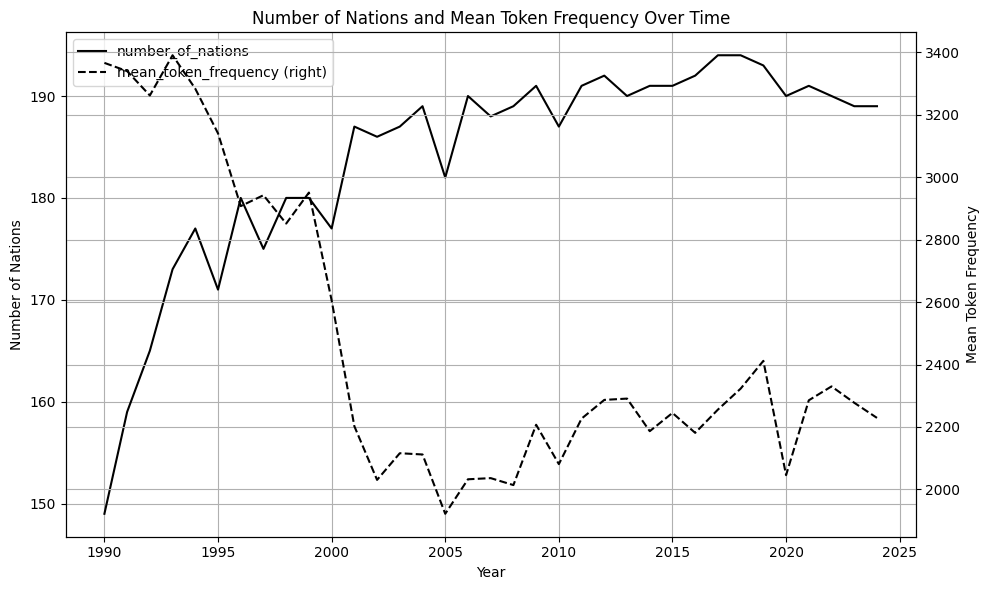

In [83]:
import matplotlib.pyplot as plt

# Create the plot
ax = df_summary.loc[1946:, ['number_of_nations', 'mean_token_frequency']].plot(
    secondary_y='mean_token_frequency',  # Secondary axis for mean_token_frequency
    figsize=(10, 6),
    color=['black', 'black'],  # Both lines in black
    style=['-', '--'],         # Solid line for nations, dashed for token frequency
    title='Number of Nations and Mean Token Frequency Over Time'
)

# Add grid to both axes
ax.grid(True)
ax.right_ax.grid(True)  # Secondary y-axis grid

# Label axes
ax.set_ylabel('Number of Nations')
ax.right_ax.set_ylabel('Mean Token Frequency')

# Adjust layout
plt.tight_layout()
plt.show()